# Machine Listening (Fall 2020)
# Lab5: Linear Regression and Logistic Regression

get authorization to read audio files in google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# lab5 - 1 : Linear Regression from Scratch

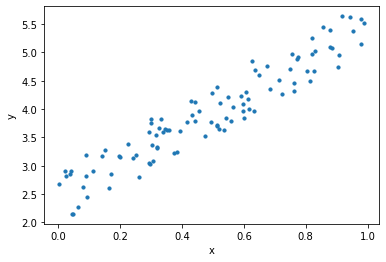

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# generate random data
np.random.seed(10)
x = np.random.rand(100, 1)
y = 2 + 3 * x + np.random.rand(100, 1)


plt.scatter(x,y,s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [6]:
# Building the model
m = 0
c = 0

X = x
Y = y

L = 0.0001  # The learning Rate
epochs = 100000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print(m, c)

[2.54134771] [2.69342714]


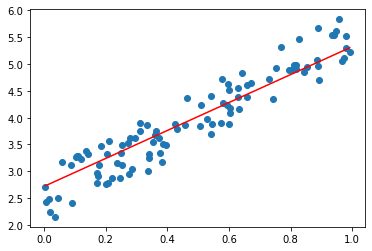

In [4]:
# plot results

Y_pred = m*X + c

plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()

# lab5 - 2 : Linear Regression using scikit-learn

In [7]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
print(reg.score(X, y))
print(reg.coef_)
print(reg.intercept_ )

0.8968056877313602
[[2.92754349]]
[2.49392672]


# lab5 - 3 : Logistic Regression from Scratch

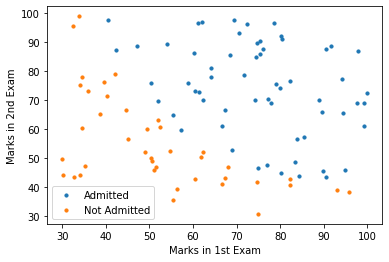

In [8]:
import pandas as pd

path = '/content/drive/My Drive/machine_listening_2020/lab/lab5/data/data_classification.txt'

data = pd.read_csv(path, header=None)


X = data.iloc[:, :-1]
y = data.iloc[:, -1]

admitted = data.loc[y == 1]

not_admitted = data.loc[y == 0]

    # plots
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.legend()
plt.show()


In [10]:
class myLogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            if(self.verbose == True and i % 10000 == 0):
                z = np.dot(X, self.theta)
                h = self.__sigmoid(z)
                print(f'loss: {self.__loss(h, y)} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold

In [11]:
# make and fit model

model = myLogisticRegression(lr=0.1, num_iter=300000)
model.fit(X, y)


0.88
[-605.23048544    4.76304661    4.73375034]


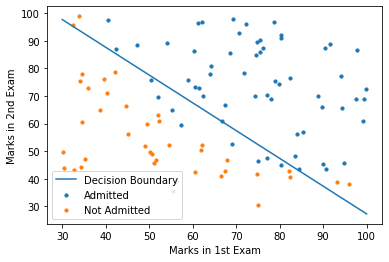

In [12]:
# results

preds = model.predict(X,0.5)
print((preds == y).mean())
print(model.theta)

plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.legend()

x_values = [30, 100]
y_values = - (model.theta[0] + np.dot(model.theta[1], x_values)) / model.theta[2]

plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.legend()
plt.show()

# lab5 - 4 : Logistic Regression using scikit-learn

In [13]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression().fit(X, y)
print(reg.score(X, y))
print(reg.coef_)
print(reg.intercept_)

0.89
[[0.20535491 0.2005838 ]]
[-25.05219314]
